<a href="https://colab.research.google.com/github/Lopesg-Marcia/project3/blob/main/Google_Ads_ML_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as srn
import statistics  as sts
import matplotlib.pyplot as plt

In [2]:
url = 'https://docs.google.com/spreadsheets/d/1M89WOPX-krEjzRs7zvjTxZqF9EUuxXW0vjXARdn-e4w/gviz/tq?tqx=out:csv'

In [3]:
dataset = pd.read_csv(url)

In [4]:
dataset.head()

Product  Clicks  Impressions    CPC  Conversions  Product Price   IQ
0  Product 1   348.0         4045  $1.50           11             49  6.0
1  Product 2   271.0         2205  $1.40           16             60  7.0
2  Product 3   767.0        10285  $1.12           40             67  7.0
3  Product 4   399.0         5555  $1.12           19             56  6.0
4  Product 5   537.0         7777  $1.12           28             61  7.0

In [5]:
dataset.shape

(500, 7)

In [6]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product        500 non-null    object 
 1   Clicks         499 non-null    float64
 2   Impressions    500 non-null    int64  
 3   CPC            499 non-null    object 
 4   Conversions    500 non-null    int64  
 5   Product Price  500 non-null    int64  
 6   IQ             499 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 27.5+ KB
None


In [7]:
temp_cpc = dataset['CPC'].str.replace('[^\d.]', '', regex=True)
print(temp_cpc.head())

0    1.50
1    1.40
2    1.12
3    1.12
4    1.12
Name: CPC, dtype: object


In [8]:
temp_cpc = pd.to_numeric(temp_cpc, errors='coerce')
print(temp_cpc.head())

0    1.50
1    1.40
2    1.12
3    1.12
4    1.12
Name: CPC, dtype: float64


In [9]:
dataset['CPC'] = temp_cpc
print(dataset['CPC'].head())


0    1.50
1    1.40
2    1.12
3    1.12
4    1.12
Name: CPC, dtype: float64


In [10]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product        500 non-null    object 
 1   Clicks         499 non-null    float64
 2   Impressions    500 non-null    int64  
 3   CPC            499 non-null    float64
 4   Conversions    500 non-null    int64  
 5   Product Price  500 non-null    int64  
 6   IQ             499 non-null    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 27.5+ KB
None


In [11]:
dataset['Spend'] = dataset['CPC'] * dataset['Clicks']

In [12]:
dataset['CTR'] = (dataset['Clicks'] / dataset['Impressions']) * 100

In [13]:
dataset['CPA'] = dataset['Spend'] / dataset['Conversions']

In [14]:
dataset['CVR'] = (dataset['Conversions'] / dataset['Clicks']) * 100

In [15]:
dataset['Revenue'] = dataset['Product Price'] * dataset['Conversions']

In [16]:
dataset['ROAS'] = dataset['Revenue'] / dataset['Spend']

In [17]:
dataset['ROAS >= 3'] = dataset['ROAS'].apply(lambda x: 'Yes' if x >= 3 else 'No')

In [18]:
dataset['ROAS >= 3'] = dataset['ROAS >= 3'].map({'Yes': 1, 'No': 0})

In [19]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product        500 non-null    object 
 1   Clicks         499 non-null    float64
 2   Impressions    500 non-null    int64  
 3   CPC            499 non-null    float64
 4   Conversions    500 non-null    int64  
 5   Product Price  500 non-null    int64  
 6   IQ             499 non-null    float64
 7   Spend          499 non-null    float64
 8   CTR            499 non-null    float64
 9   CPA            499 non-null    float64
 10  CVR            499 non-null    float64
 11  Revenue        500 non-null    int64  
 12  ROAS           499 non-null    float64
 13  ROAS >= 3      500 non-null    int64  
dtypes: float64(8), int64(5), object(1)
memory usage: 54.8+ KB
None


In [20]:
dataset.describe()


Clicks   Impressions         CPC  Conversions  Product Price  \
count   499.000000    500.000000  499.000000   500.000000     500.000000   
mean    589.042084   7073.748000    1.359960    28.224000      43.444000   
std     233.816528   3655.743075   11.155968    11.949368      15.074925   
min     202.000000   2004.000000    0.440000     8.000000      11.000000   
25%     376.500000   4254.750000    0.640000    18.000000      30.000000   
50%     583.000000   6358.000000    0.820000    28.000000      43.000000   
75%     780.000000   8835.000000    1.100000    36.250000      56.000000   
max    1000.000000  18411.000000  250.000000    58.000000      70.000000   

               IQ          Spend         CTR          CPA         CVR  \
count  499.000000     499.000000  499.000000   499.000000  499.000000   
mean     7.254509     880.353307    8.963157    29.429203    4.856496   
std      1.260042    8352.719961    2.392649   245.494772    0.880617   
min      5.000000     112.500000    5.007481     8.184000    2.564103   
25%      7.000000     306.075000    7.298744    13.446774    4.326559   
50%      7.000000     448.400000    8.853176    17.277000    4.934211   
75%      8.000000     649.780000   10.565931    21.930139    5.648181   
max     10.000000  187000.000000   14.956737  5500.000000    6.052270   

           Revenue        ROAS   ROAS >= 3  
count   500.000000  499.000000  500.000000  
mean   1226.268000    2.667406    0.332000  
std     694.493853    1.345085    0.471403  
min     165.000000    0.010182    0.000000  
25%     680.000000    1.654006    0.000000  
50%    1060.000000    2.441327    0.000000  
75%    1651.500000    3.381469    1.000000  
max    3710.000000    7.445590    1.000000

In [21]:
dataset = dataset.drop(['Product'], axis=1)

In [22]:
dataset.describe()

Clicks   Impressions         CPC  Conversions  Product Price  \
count   499.000000    500.000000  499.000000   500.000000     500.000000   
mean    589.042084   7073.748000    1.359960    28.224000      43.444000   
std     233.816528   3655.743075   11.155968    11.949368      15.074925   
min     202.000000   2004.000000    0.440000     8.000000      11.000000   
25%     376.500000   4254.750000    0.640000    18.000000      30.000000   
50%     583.000000   6358.000000    0.820000    28.000000      43.000000   
75%     780.000000   8835.000000    1.100000    36.250000      56.000000   
max    1000.000000  18411.000000  250.000000    58.000000      70.000000   

               IQ          Spend         CTR          CPA         CVR  \
count  499.000000     499.000000  499.000000   499.000000  499.000000   
mean     7.254509     880.353307    8.963157    29.429203    4.856496   
std      1.260042    8352.719961    2.392649   245.494772    0.880617   
min      5.000000     112.500000    5.007481     8.184000    2.564103   
25%      7.000000     306.075000    7.298744    13.446774    4.326559   
50%      7.000000     448.400000    8.853176    17.277000    4.934211   
75%      8.000000     649.780000   10.565931    21.930139    5.648181   
max     10.000000  187000.000000   14.956737  5500.000000    6.052270   

           Revenue        ROAS   ROAS >= 3  
count   500.000000  499.000000  500.000000  
mean   1226.268000    2.667406    0.332000  
std     694.493853    1.345085    0.471403  
min     165.000000    0.010182    0.000000  
25%     680.000000    1.654006    0.000000  
50%    1060.000000    2.441327    0.000000  
75%    1651.500000    3.381469    1.000000  
max    3710.000000    7.445590    1.000000

In [23]:
outliers = {}

for column in dataset:
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers[column] = dataset[(dataset[column] < limite_inferior) | (dataset[column] > limite_superior)]

# Print outliers for each column
for column, df_outliers in outliers.items():
    print(f"Outliers in column {column}:")
    print(df_outliers)

Outliers in column Clicks:
Empty DataFrame
Columns: [Clicks, Impressions, CPC, Conversions, Product Price, IQ, Spend, CTR, CPA, CVR, Revenue, ROAS, ROAS >= 3]
Index: []
Outliers in column Impressions:
     Clicks  Impressions   CPC  Conversions  Product Price   IQ    Spend  \
40    984.0        18411  1.06           42             65  5.0  1043.04   
45    974.0        18328  1.37           40             28  7.0  1334.38   
58    980.0        16228  1.04           52             49  6.0  1019.20   
68    988.0        16374  1.03           43             54  6.0  1017.64   
75    957.0        18328  1.02           54             25  5.0   976.14   
111   908.0        17668  1.48           53             41  7.0  1343.84   
118   920.0        15901  0.91           28             23  6.0   837.20   
166   868.0        15883  0.83           39             25  5.0   720.44   
178   974.0        16172  1.32           29             55  7.0  1285.68   
186   978.0        16209  0.78         

In [24]:
dataset= dataset[(dataset['CPC'] >= limite_inferior) & (dataset['CPC'] <= limite_superior)]

In [25]:
dataset.describe()

Clicks   Impressions         CPC  Conversions  Product Price  \
count   498.000000    498.000000  498.000000   498.000000     498.000000   
mean    588.722892   7071.160643    0.860683    28.253012      43.425703   
std     233.942785   3659.364038    0.257242    11.936124      15.093921   
min     202.000000   2004.000000    0.440000     8.000000      11.000000   
25%     376.250000   4254.250000    0.640000    18.000000      30.000000   
50%     582.500000   6358.000000    0.820000    28.000000      43.000000   
75%     780.500000   8827.000000    1.095000    36.750000      56.000000   
max    1000.000000  18411.000000    1.500000    58.000000      70.000000   

               IQ        Spend         CTR         CPA         CVR  \
count  498.000000   498.000000  498.000000  498.000000  498.000000   
mean     7.257028   506.619076    8.966489   18.444121    4.857120   
std      1.260050   262.886565    2.393896    7.242104    0.881392   
min      5.000000   112.500000    5.007481    8.184000    2.564103   
25%      7.000000   305.672500    7.303704   13.443387    4.323773   
50%      7.000000   447.950000    8.859212   17.274500    4.979067   
75%      8.000000   646.505000   10.587258   21.916875    5.650601   
max     10.000000  1343.840000   14.956737   47.454545    6.052270   

           Revenue        ROAS   ROAS >= 3  
count   498.000000  498.000000  498.000000  
mean   1226.726908    2.672742    0.333333  
std     694.035797    1.341141    0.471879  
min     165.000000    0.460574    0.000000  
25%     681.000000    1.662928    0.000000  
50%    1060.000000    2.442592    0.000000  
75%    1648.250000    3.382203    1.000000  
max    3710.000000    7.445590    1.000000

In [26]:
dataset['CPC'].describe()

count    498.000000
mean       0.860683
std        0.257242
min        0.440000
25%        0.640000
50%        0.820000
75%        1.095000
max        1.500000
Name: CPC, dtype: float64

In [27]:
dataset.isnull().sum()

Clicks           0
Impressions      0
CPC              0
Conversions      0
Product Price    0
IQ               0
Spend            0
CTR              0
CPA              0
CVR              0
Revenue          0
ROAS             0
ROAS >= 3        0
dtype: int64

In [28]:
col_with_nulls = dataset.columns[dataset.isnull().any()].tolist()

In [29]:
for column in col_with_nulls:
    mediana = dataset[column].median()
    dataset[column].fillna(mediana, inplace=True)

In [30]:
dataset.isnull().sum()

Clicks           0
Impressions      0
CPC              0
Conversions      0
Product Price    0
IQ               0
Spend            0
CTR              0
CPA              0
CVR              0
Revenue          0
ROAS             0
ROAS >= 3        0
dtype: int64

In [31]:
dup = dataset.duplicated()
num_duplicates = dup.sum()
print(f"Number of duplicated rows: {num_duplicates}")

Number of duplicated rows: 0


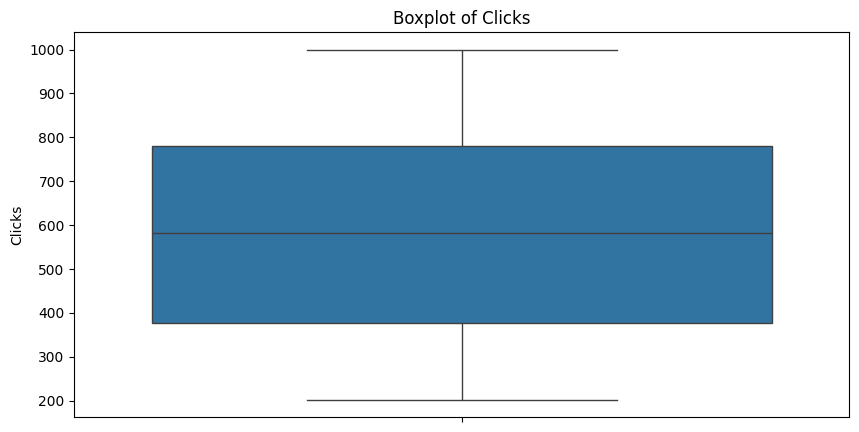

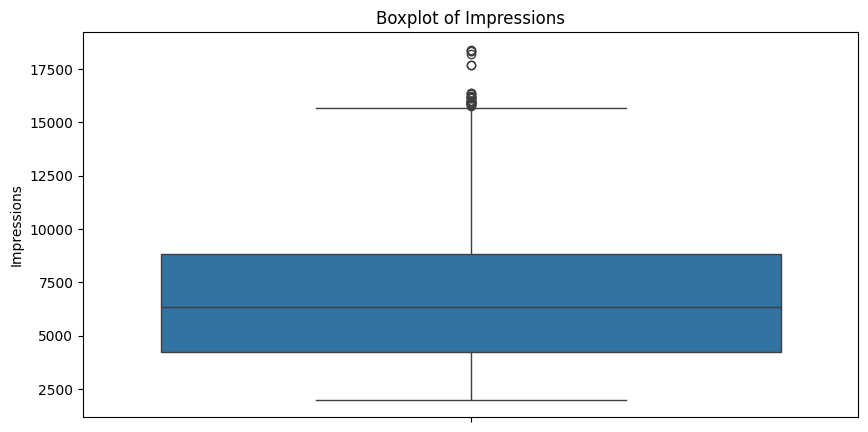

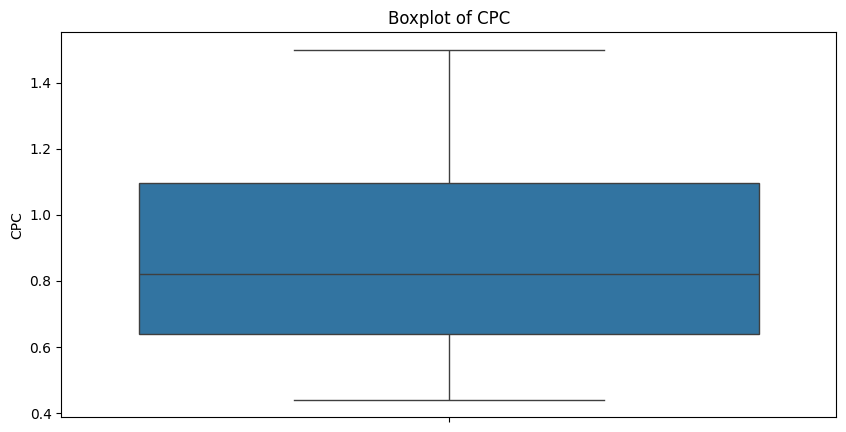

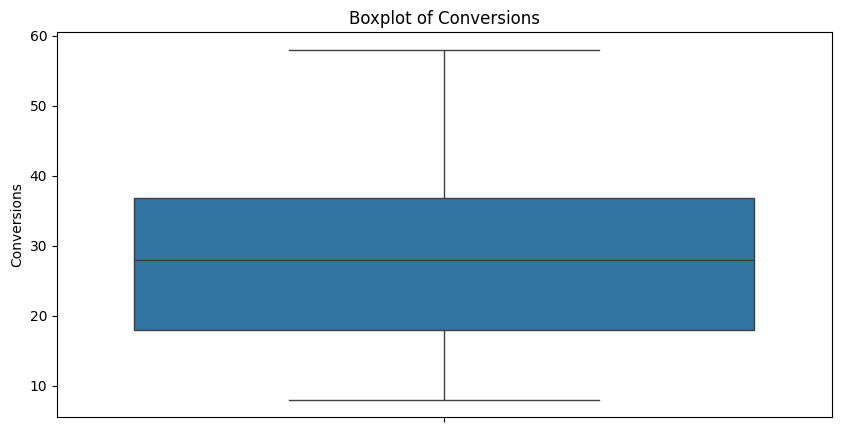

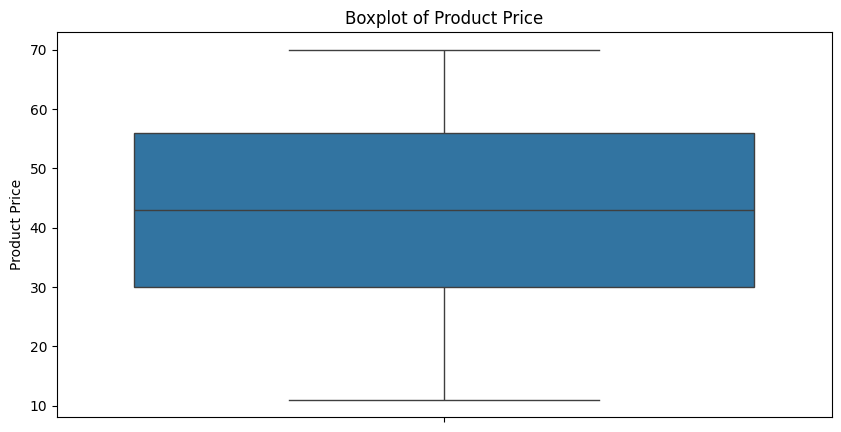

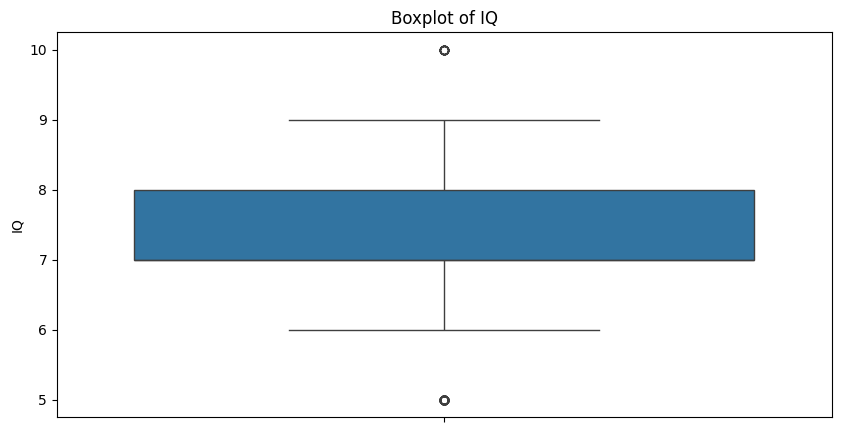

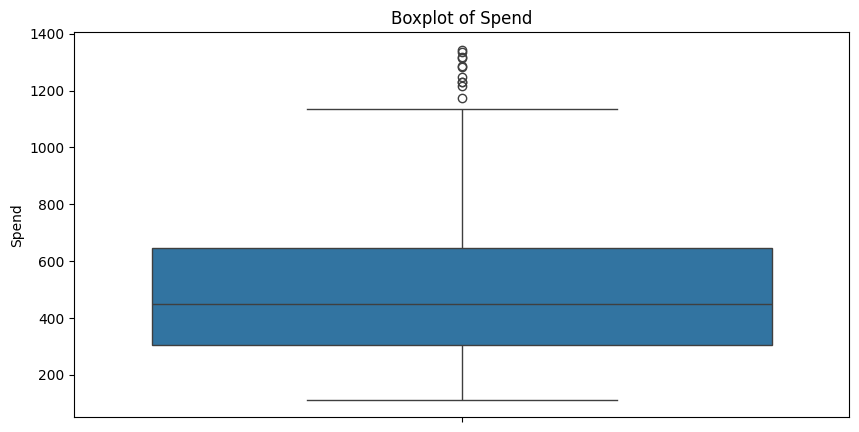

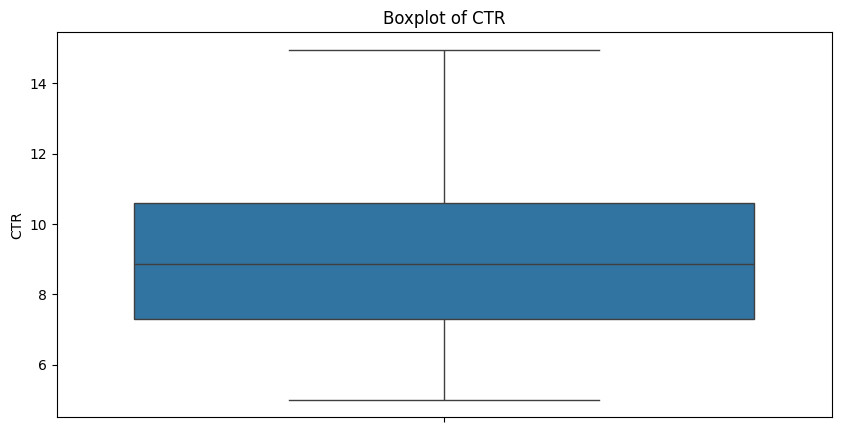

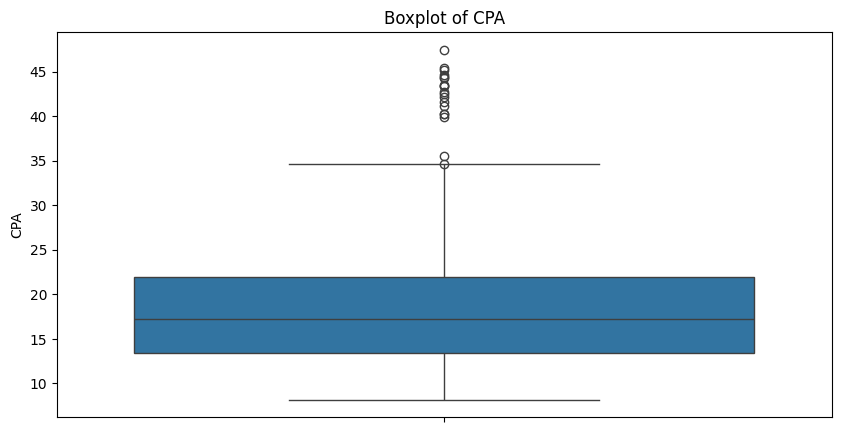

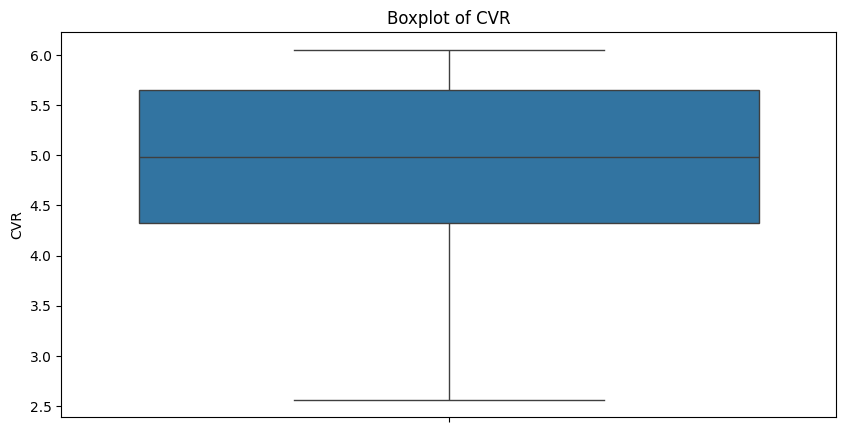

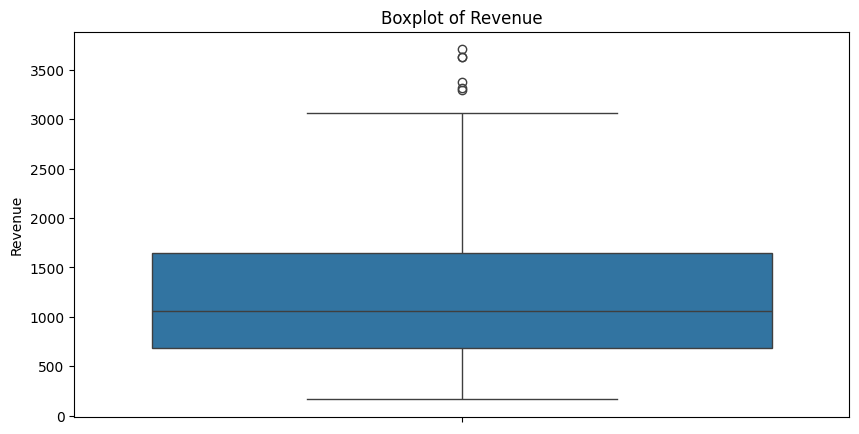

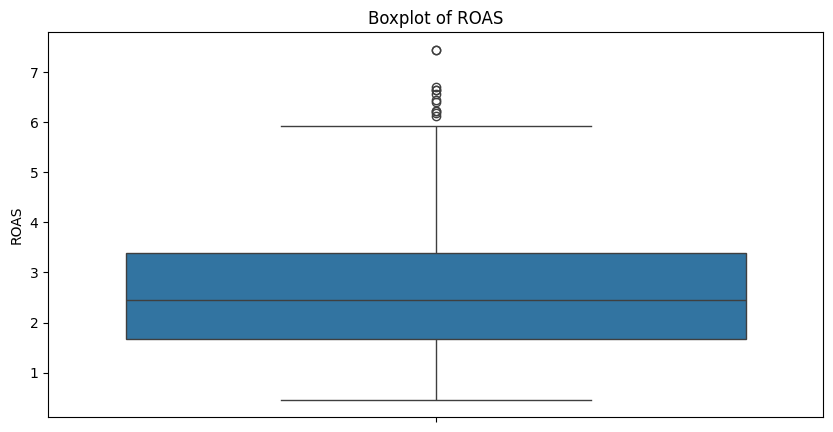

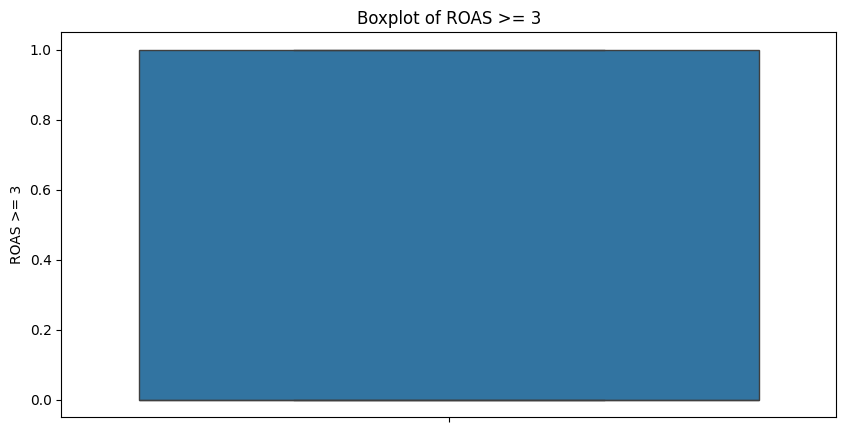

In [32]:
for column in dataset.columns:
    plt.figure(figsize=(10, 5))
    srn.boxplot(data=dataset[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel('')
    plt.show()

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, accuracy_score, confusion_matrix
import pickle


In [34]:
class_distribution = dataset['ROAS >= 3'].value_counts()
print(class_distribution)

ROAS >= 3
0    332
1    166
Name: count, dtype: int64


In [35]:
X = dataset[[ 'CPC', 'Product Price', 'IQ', 'Spend', 'CTR', 'CVR']]
y = dataset['ROAS >= 3']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [39]:
print("Class distribution in the training set after SMOTE:")
print(pd.Series(y_train_smote).value_counts())

Class distribution in the training set after SMOTE:
ROAS >= 3
0    260
1    260
Name: count, dtype: int64


In [40]:
log_reg = LogisticRegression()
log_reg.fit(X_train_smote, y_train_smote)

LogisticRegression()

In [41]:
y_pred = log_reg.predict(X_test_scaled)
y_pred_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

In [42]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
class_report = classification_report(y_test, y_pred)

In [43]:
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("\n--- Confusion Matrix ---")
print("Confusion Matrix:\n", conf_matrix)
print("True Negatives (TN):", conf_matrix[0, 0])
print("False Positives (FP):", conf_matrix[0, 1])
print("False Negatives (FN):", conf_matrix[1, 0])
print("True Positives (TP):", conf_matrix[1, 1])
print(f"ROC AUC Score: {roc_auc:.2f}")
print("\n--- Classification Report ---")
print(class_report)

Model Accuracy: 99.00%

--- Confusion Matrix ---
Confusion Matrix:
 [[72  0]
 [ 1 27]]
True Negatives (TN): 72
False Positives (FP): 0
False Negatives (FN): 1
True Positives (TP): 27
ROC AUC Score: 1.00

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.96      0.98        28

    accuracy                           0.99       100
   macro avg       0.99      0.98      0.99       100
weighted avg       0.99      0.99      0.99       100



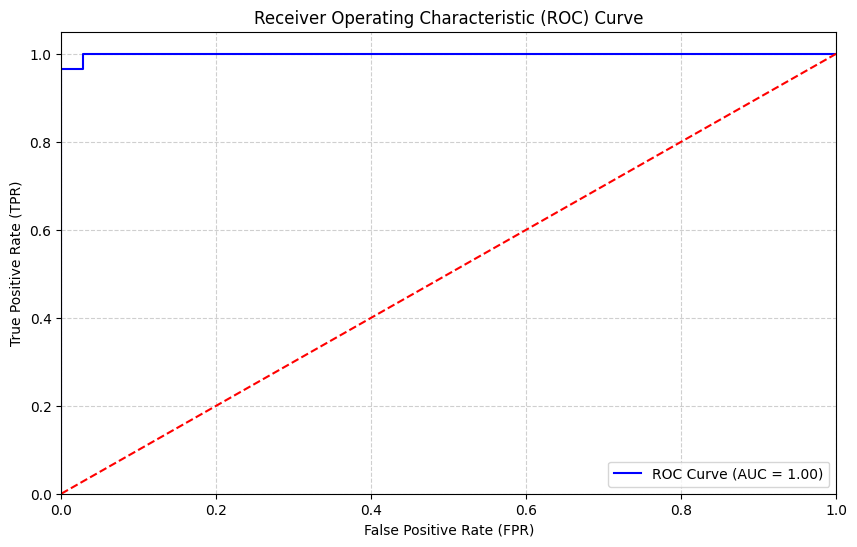

In [44]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal dashed line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [45]:
# Check the range of predicted probabilities
min_prob = y_pred_prob.min()
max_prob = y_pred_prob.max()
print("Range of predicted probabilities:")
print(f"Min: {min_prob:.10f}, Max: {max_prob:.10f}")


Range of predicted probabilities:
Min: 0.0000000001, Max: 0.9999936937


In [46]:
print("\nInterpretation:")
if min_prob < 0.01 and max_prob > 0.99:
    print("The predicted probabilities span from near 0 to near 1, which indicates that the model is generating a wide range of confidence levels.")
    print("This suggests that the model is effectively distinguishing between classes and should produce a meaningful ROC curve.")
else:
    print("The range of predicted probabilities is not as wide as expected.")
    print("This might indicate that the model is not distinguishing well between classes or may need further adjustment.")



Interpretation:
The predicted probabilities span from near 0 to near 1, which indicates that the model is generating a wide range of confidence levels.
This suggests that the model is effectively distinguishing between classes and should produce a meaningful ROC curve.


In [47]:
from sklearn.metrics import classification_report, accuracy_score

# Evaluate model on training and test sets
y_train_pred = log_reg.predict(X_train_smote)
y_train_pred_prob = log_reg.predict_proba(X_train_smote)[:, 1]

print("Training Accuracy:", accuracy_score(y_train_smote, y_train_pred))
print("Training ROC AUC Score:", roc_auc_score(y_train_smote, y_train_pred_prob))

print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("Test ROC AUC Score:", roc_auc_score(y_test, y_pred_prob))


Training Accuracy: 0.9903846153846154
Training ROC AUC Score: 0.9999704142011835

Test Accuracy: 0.99
Test ROC AUC Score: 0.9990079365079365


In [48]:
print("\n--- Additional Evaluation Metrics Explained ---")
print("1. **ROC AUC Score**: A measure of how well the model distinguishes between classes. Closer to 1 is better.")
print("2. **Cohen's Kappa**: Measures how well the predicted labels match the actual labels, adjusting for chance.")
print("3. **Log Loss**: Measures the uncertainty of predictions. Lower values are better.")
print("4. **Cross-Validation Accuracy**: Shows model accuracy across 5 different splits of the data.")
print("5. **ROC Curve**: Shows the trade-off between True Positive Rate (Recall) and False Positive Rate (FPR).")
print("6. **Precision-Recall Curve**: Shows the trade-off between Precision and Recall.")


--- Additional Evaluation Metrics Explained ---
1. **ROC AUC Score**: A measure of how well the model distinguishes between classes. Closer to 1 is better.
2. **Cohen's Kappa**: Measures how well the predicted labels match the actual labels, adjusting for chance.
3. **Log Loss**: Measures the uncertainty of predictions. Lower values are better.
4. **Cross-Validation Accuracy**: Shows model accuracy across 5 different splits of the data.
5. **ROC Curve**: Shows the trade-off between True Positive Rate (Recall) and False Positive Rate (FPR).
6. **Precision-Recall Curve**: Shows the trade-off between Precision and Recall.


In [49]:
new_data = pd.DataFrame({
    'CPC': [0.75],
    'Product Price': [40],
    'IQ': [8],
    'Spend': [337.5],
    'CTR': [9.0],
    'CVR': [4.0]
})

In [50]:
new_data_scaled = scaler.transform(new_data)

In [51]:
predictions = log_reg.predict(new_data_scaled)
predicted_probabilities = log_reg.predict_proba(new_data_scaled)[:, 1]

In [52]:
predictions_labels = ['Yes' if prob > 0.5 else 'No' for prob in predicted_probabilities]


In [53]:
results = new_data.copy()
results['Predicted'] = predictions_labels
results['Probability'] = predicted_probabilities

In [88]:
print("\nPrediction Results For input data:")
for i, row in results.iterrows():
    print(f"\nCPC: {row['CPC']}, Product Price: {row['Product Price']}, IQ: {row['IQ']}, Spend: {row['Spend']}, CTR: {row['CTR']}, CVR: {row['CVR']}")
    print(f"Predicted class: {row['Predicted']}")
    print("Test Accuracy:", accuracy_score(y_test, y_pred))
    print(f"Predicted probability of 'ROAS 3 or Higher': {row['Probability']:.4f}")
    if row['Probability'] > 0.5:
        print("Interpretation: The model is confident that this data point falls into 'ROAS 3 or Higher'.")
    else:
        print("Interpretation: The model is confident that this data point falls into 'Less than ROAS 3'.")


Prediction Results For input data:

CPC: 1.0, Product Price: 40.0, IQ: 8.0, Spend: 1000.0, CTR: 10.0, CVR: 3.0
Predicted class: Less than ROAS 3
Test Accuracy: 0.99
Predicted probability of 'ROAS 3 or Higher': 0.0000
Interpretation: The model is confident that this data point falls into 'Less than ROAS 3'.


In [75]:
cpc = float(input("Enter CPC: "))
product_price = float(input("Enter Product Price: "))
iq = float(input("Enter IQ: "))
spend = float(input("Enter Spend: "))
ctr = float(input("Enter CTR: "))
cvr = float(input("Enter CVR: "))


Enter CPC: 1
Enter Product Price: 40
Enter IQ: 8
Enter Spend: 1000
Enter CTR: 10
Enter CVR: 3


In [76]:
user_data = pd.DataFrame([[cpc, product_price, iq, spend, ctr, cvr]], columns=['CPC', 'Product Price', 'IQ', 'Spend', 'CTR', 'CVR'])


In [77]:
user_data_scaled = scaler.transform(user_data)

In [78]:
prob = log_reg.predict_proba(user_data_scaled)[0, 1]
pred_class = 'ROAS 3 or Higher' if prob > 0.5 else 'Less than ROAS 3'

In [79]:
results = user_data.copy()
results['Predicted'] = pred_class
results['Probability'] = prob

In [89]:
print("\nPrediction Results For User data:")
for i, row in results.iterrows():
    print(f"\nCPC: {row['CPC']}, Product Price: {row['Product Price']}, IQ: {row['IQ']}, Spend: {row['Spend']}, CTR: {row['CTR']}, CVR: {row['CVR']}")
    print(f"Predicted class: {row['Predicted']}")
    print("Test Accuracy:", accuracy_score(y_test, y_pred))
    print(f"Predicted probability of class 'Yes': {row['Probability']:.4f}")

    if row['Probability'] > 0.5:
        print("Interpretation: The model is confident that this data point belongs to the positive class ('Yes').")
    else:
        print("Interpretation: The model is confident that this data point belongs to the negative class ('No').")


Prediction Results For User data:

CPC: 1.0, Product Price: 40.0, IQ: 8.0, Spend: 1000.0, CTR: 10.0, CVR: 3.0
Predicted class: Less than ROAS 3
Test Accuracy: 0.99
Predicted probability of class 'Yes': 0.0000
Interpretation: The model is confident that this data point belongs to the negative class ('No').
